In [1]:
import numpy as np
import matplotlib.pyplot as plt


In [2]:
from numpy.polynomial import Polynomial

---

# Lagrange polynomials

In [78]:
X = np.arange(5)
Y = np.sin(X)

base = []
for i,x in enumerate(X):
    f = np.poly1d([1])
    for k,y in enumerate(X):
        if i == k : continue
        f *= np.poly1d([1, -y])/( x - y)
    base.append(f)

In [33]:
fit = sum([ y*p for y, p  in zip(Y,base)])
fit = np.poly1d(fit)

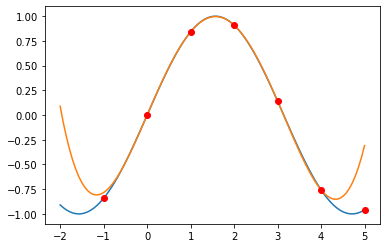

In [47]:
T = np.linspace(-2,5,100)

plt.plot(T, np.sin(T))
plt.plot(T,fit(T));
pts = np.arange(-1,6)
plt.plot(pts, np.sin(pts),'ro');

---

# Newton’s Polynomial Interpolation

Then I got tired and I got the code from 
[here](https://pythonnumericalmethods.berkeley.edu/notebooks/chapter17.05-Newtons-Polynomial-Interpolation.html)

In [85]:
def divided_diff(x, y):
    '''
    function to calculate the divided
    differences table
    '''
    n = len(y)
    coef = np.zeros([n, n])
    # the first column is y
    coef[:,0] = y
    
    for j in range(1,n):
        for i in range(n-j):
            coef[i][j] = \
           (coef[i+1][j-1] - coef[i][j-1]) / (x[i+j] - x[i])
            
    return coef

def newton_poly(coef, x_data, x):
    '''
    evaluate the newton polynomial 
    at x
    '''
    n = len(x_data) - 1 
    #then it's like horner
    p = coef[n]
    for k in range(1, n+1):
        p = coef[n-k] + (x - x_data[n-k])*p
    return p



(5,)


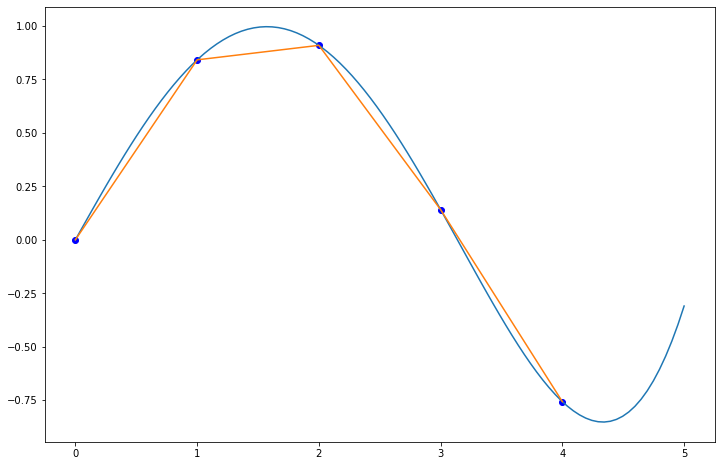

In [84]:
x = X
y = Y
# get the divided difference coef
a_s = divided_diff(x, y)[0, :]
print(a_s.shape)
# evaluate on new data points
x_new = np.linspace(0,5,100)
y_new = newton_poly(a_s, x, x_new)


plt.figure(figsize = (12, 8))
plt.plot(x, y, 'bo')
plt.plot(x_new, y_new)
plt.plot(X,Y);

---

# Runge

[compare with this](https://en.wikipedia.org/wiki/Runge%27s_phenomenon)

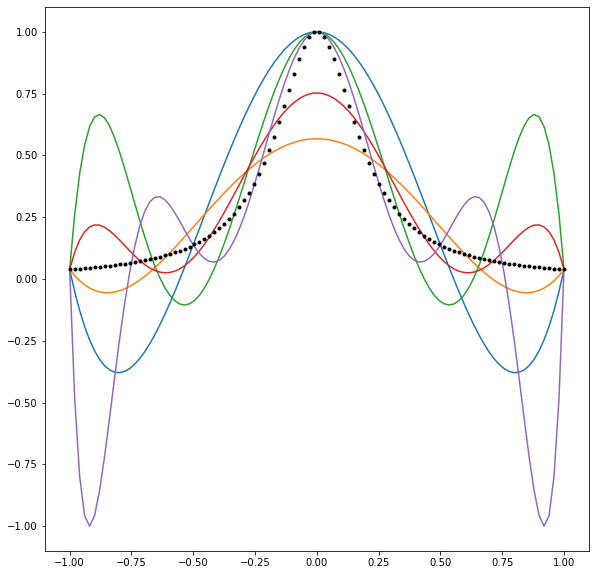

In [70]:
fig, ax  = plt.subplots(1, figsize=(30, 10))
ax.set_aspect('equal')

x_new = np.linspace(-1,1,100)

for N in range(5,10):
    X = np.linspace(-1,1,N)
    Y = 1/(1 + 25*X**2)
    #ax.plot(X,Y,'b.')
    a_s = divided_diff(X, Y)[0, :]
    y_new = newton_poly(a_s, X, x_new)
    ax.plot(x_new,y_new)
    
X = x_new
Y = 1/(1 + 25*X**2)
ax.plot(x_new, Y,'k.');